In [52]:
# Импорт основных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Библиотеки для статистический анализа
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.multicomp as mc

# Библиотеки для формирования выборки
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Библиотеки для алгоритмов моделирования данных и оценки
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('F:/Рабочий стол/AB Test/WA_Marketing-Campaign.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [4]:
print('Количество строк:', df.shape[0])
print('Количество столбцов:', df.shape[1])

Количество строк: 548
Количество столбцов: 7


In [5]:
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [6]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


# Визуализация

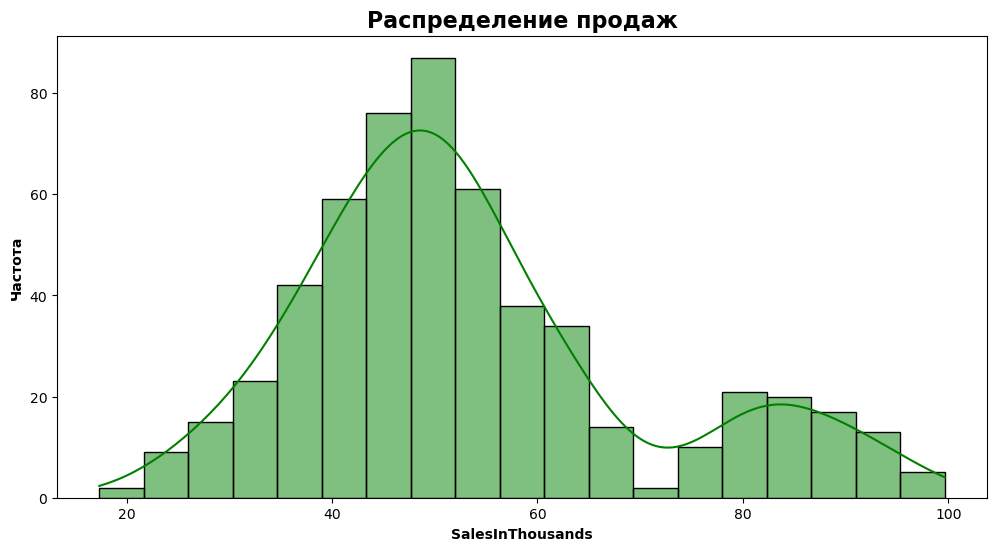

In [8]:
plt.figure(figsize = (12,6))
sns.histplot(df['SalesInThousands'], kde = True, color = 'g')
plt.title('Распределение продаж', fontsize = 16, fontweight = 'bold')
plt.xlabel('SalesInThousands', fontweight = 'bold')
plt.ylabel('Частота', fontweight = 'bold')
plt.show()

Text(0, 0.5, 'Часота')

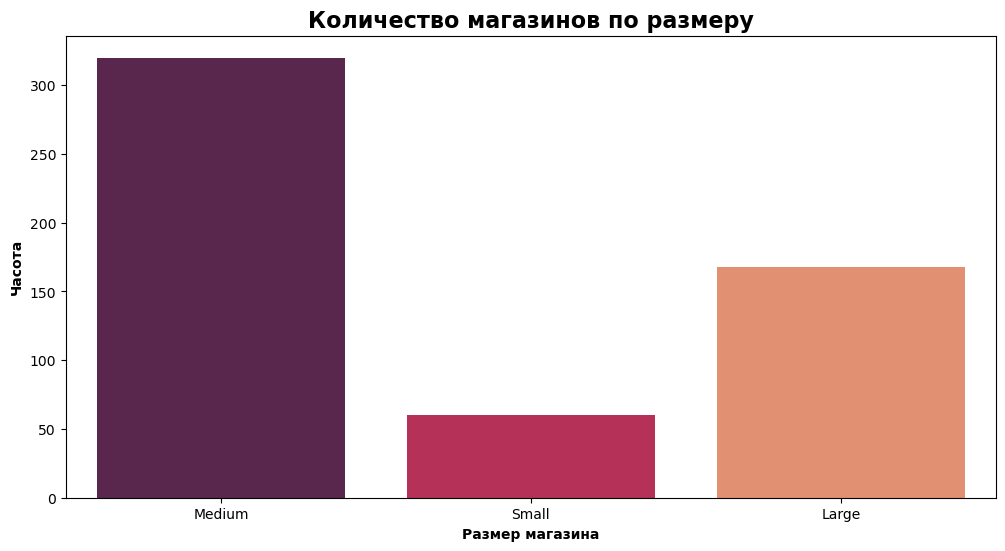

In [9]:
plt.figure(figsize = (12,6))
sns.countplot(data = df, x = 'MarketSize', palette = 'rocket')
plt.title('Количество магазинов по размеру', fontsize = 16, fontweight = 'bold')
plt.xlabel('Размер магазина', fontweight = 'bold')
plt.ylabel('Часота', fontweight = 'bold')

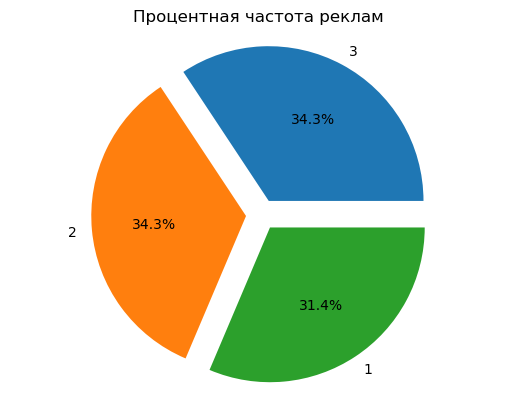

In [10]:
labels = df.Promotion.unique().tolist()
sizes = df.Promotion.value_counts().tolist()
explode = (0.1, 0.1, 0.1)
plt.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Процентная частота реклам')
plt.show()

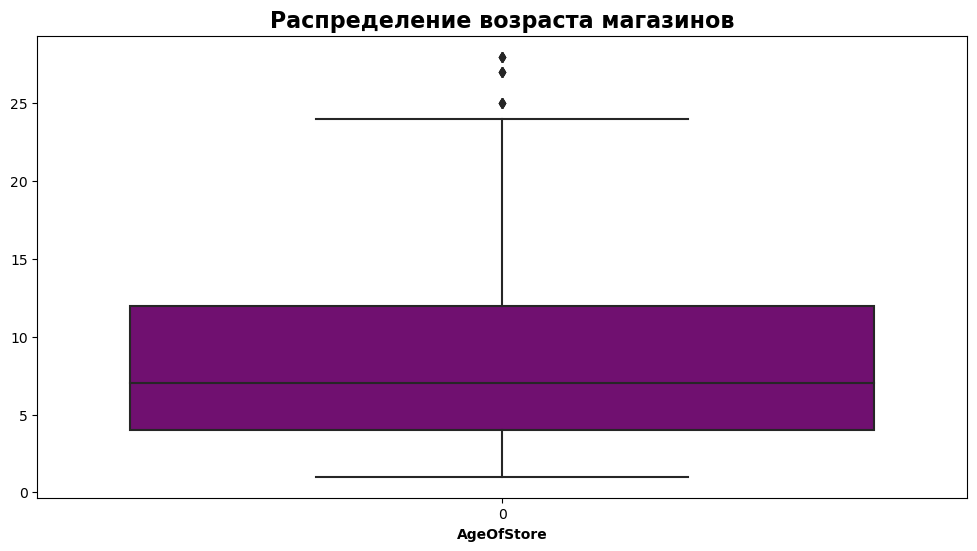

In [11]:
plt.figure(figsize = (12,6))
sns.boxplot(df['AgeOfStore'], color = 'purple')
plt.title('Распределение возраста магазинов', fontsize = 16, fontweight = 'bold')
plt.xlabel('AgeOfStore', fontweight = 'bold')
plt.show()

Text(0, 0.5, 'SalesInThousands')

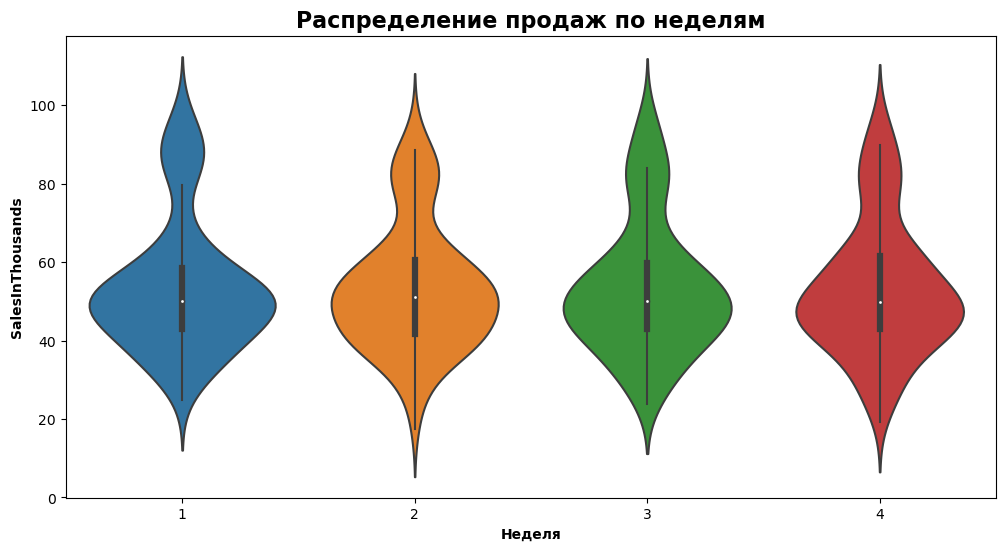

In [12]:
plt.figure(figsize = (12,6))
sns.violinplot(data = df, x = 'week', y = 'SalesInThousands')
plt.title('Распределение продаж по неделям', fontsize = 16, fontweight = 'bold')
plt.xlabel('Неделя', fontweight = 'bold')
plt.ylabel('SalesInThousands', fontweight = 'bold')

Text(0, 0.5, 'SalesInThousands')

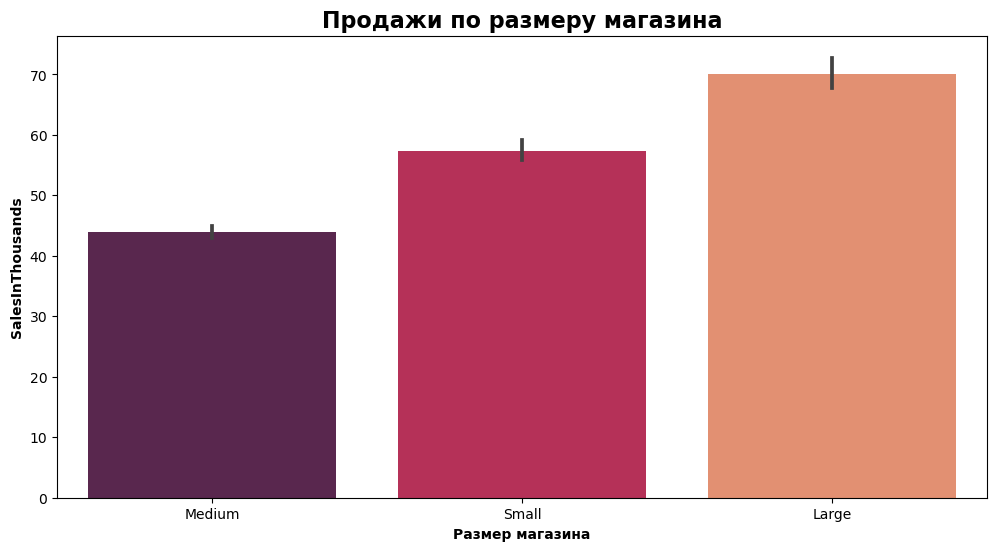

In [13]:
plt.figure(figsize = (12,6))
sns.barplot(data = df, x = 'MarketSize', y = 'SalesInThousands', palette = 'rocket')
plt.title('Продажи по размеру магазина', fontsize = 16, fontweight = 'bold')
plt.xlabel('Размер магазина', fontweight = 'bold')
plt.ylabel('SalesInThousands', fontweight = 'bold')

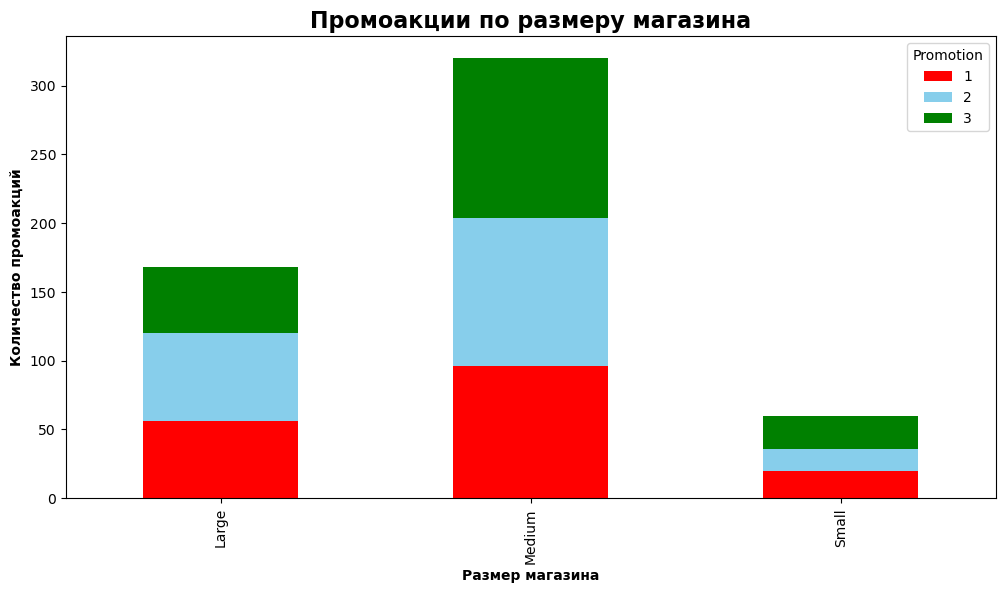

In [14]:
promo_by_market = df.groupby(by = ['Promotion', 'MarketSize'])['Promotion'].count().unstack('Promotion')
promo_by_market.plot(kind = 'bar', stacked = True, figsize = (12,6), color = ['red', 'skyblue', 'green'])
plt.title('Промоакции по размеру магазина', fontsize = 16, fontweight = 'bold')
plt.xlabel('Размер магазина', fontweight = 'bold')
plt.ylabel('Количество промоакций', fontweight = 'bold')
plt.show()

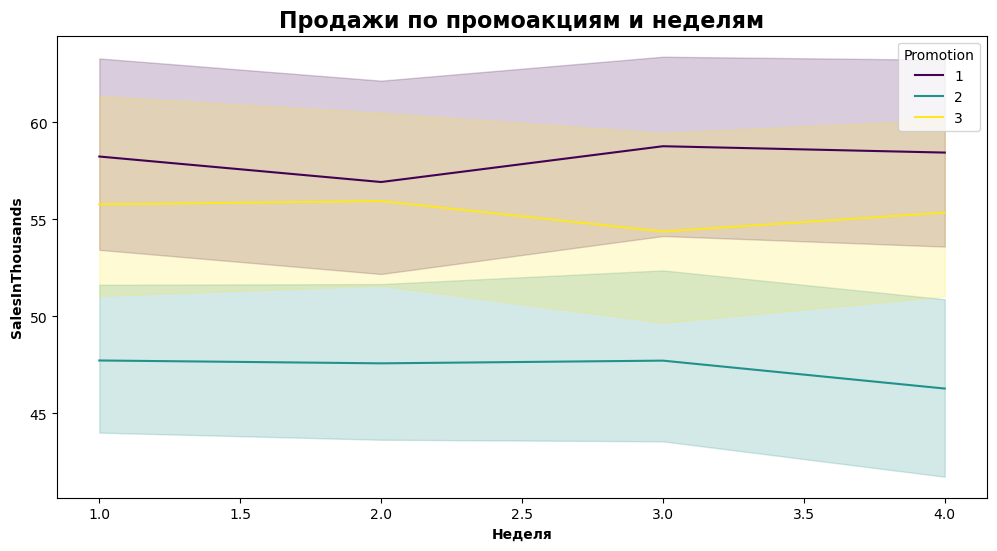

In [15]:
plt.figure(figsize = (12,6))
sns.lineplot(data = df, x = 'week',  y ='SalesInThousands', hue = 'Promotion', palette = 'viridis')
plt.title('Продажи по промоакциям и неделям', fontsize = 16, fontweight = 'bold')
plt.xlabel('Неделя', fontweight = 'bold')
plt.ylabel('SalesInThousands', fontweight = 'bold')
plt.show()

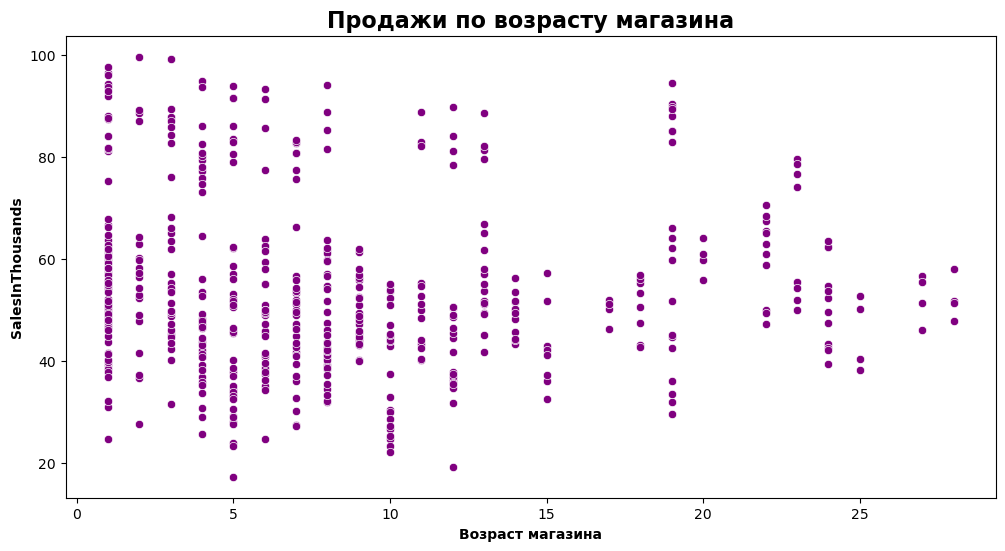

In [16]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = df, x = 'AgeOfStore', y = 'SalesInThousands', color = 'purple')
plt.title('Продажи по возрасту магазина', fontsize = 16, fontweight = 'bold')
plt.xlabel('Возраст магазина', fontweight = 'bold')
plt.ylabel('SalesInThousands', fontweight = 'bold')
plt.show()

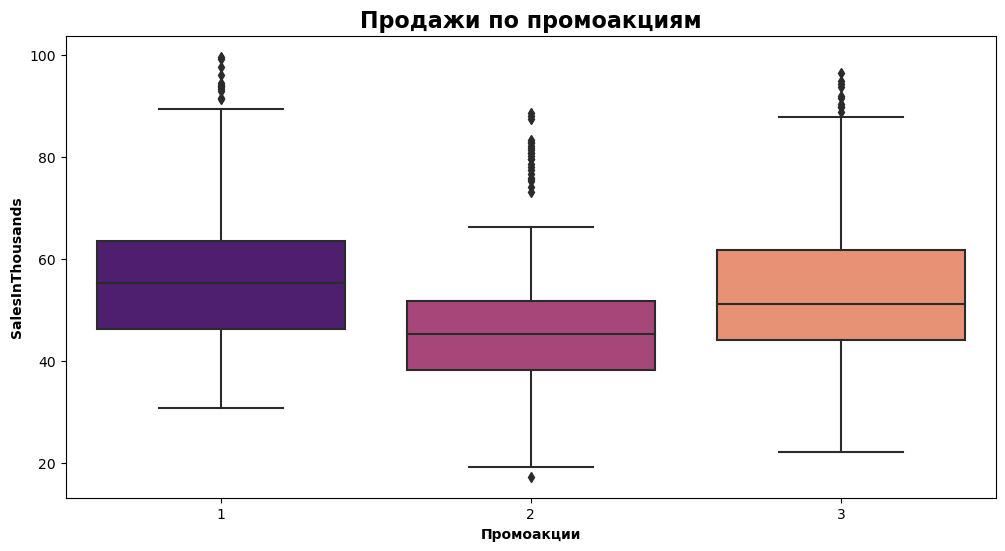

In [17]:
plt.figure(figsize = (12,6))
sns.boxplot(data = df, x = 'Promotion', y = 'SalesInThousands', palette = 'magma')
plt.title('Продажи по промоакциям', fontsize = 16, fontweight = 'bold')
plt.xlabel('Промоакции', fontweight = 'bold')
plt.ylabel('SalesInThousands', fontweight = 'bold')
plt.show()

# Удаление выбросов

In [18]:
def check_outliers(df, col):

    ''' 
    Эта функция принимает фрейм данных и столбец в качестве 
    входных данных и возвращает логическое
    значение, указывающее, содержит ли столбец выбросы или нет 
    '''

    q1 = df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    outliers = (df[col] < lower) | (df[col] > upper)
    return outliers.any()

def remove_outliers(df, col):
    
    '''
    Эта функция принимает фрейм данных и столбец в качестве 
    входных данных и удаляет выбросы
    из столбца, используя метод IQR
    '''
    
    q1 = df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [19]:
# Проверка столбца SalesInThousands на выбросы
if check_outliers(df, 'SalesInThousands'):
    # Удаление выбросов из столбца SalesInThousands
    df = remove_outliers(df, 'SalesInThousands')

# Проверека столбца AgeOfStore на выбросы     
if check_outliers(df, 'AgeOfStore'):
    # Удаление выбросов из столбца AgeOfStore
    df = remove_outliers(df, 'AgeOfStore')

# Проверка гипотез

### Оказывает ли рекламная акция существенное влияние на продажи?

Нулевая гипотеза (H0): Нет существенной разницы в продажах между различными рекламными акциями.

Альтернативная гипотеза (H1): Существует существенная разница в продажах между различными рекламными акциями

Подходящая проверка гипотезы: Односторонний ANOVA (дисперсионный анализ). Односторонний ANOVA-тест подходит для этого исследовательского вопроса, поскольку он сравнивает средние показатели продаж для каждой из трех различных рекламных акций и определяет, являются ли различия между ними статистически значимыми.

In [20]:
promoA = df[df['Promotion'] == 1]['SalesInThousands']
promoB = df[df['Promotion'] == 2]['SalesInThousands']
promoC = df[df['Promotion'] == 3]['SalesInThousands']

alpha = 0.05

fvalue, pvalue = stats.f_oneway(promoA, promoB, promoC)

print(f'\nF-value: {fvalue:.3f}\np-Value: {pvalue:.3f}\n') 

if pvalue < alpha:
    print('Отклоняем нулевую гипотезу. Промоакция оказывает значительное влияние на продажи')
else:
    print('Принимаем нулевую гипотезу. Промоакция не оказывает значительно влияение на продажи')
      


F-value: 14.512
p-Value: 0.000

Отклоняем нулевую гипотезу. Промоакция оказывает значительное влияние на продажи


### Есть ли существенная разница в продажах между двумя различными протестированными рекламными акциями?

Нулевая гипотеза (H0): Акция не оказывает существенного влияния на продажи

Альтернативная гипотеза (H1): Рекламная акция оказывает значительное влияние на продажи нового

In [21]:
promo_A = df[df['Promotion'] == 1]['SalesInThousands']
promo_B = df[df['Promotion'] == 2]['SalesInThousands']

t_stat, p_val = ttest_ind(promo_A, promo_B)

alpha = 0.05

print(f'\nT-Statistic: {t_stat:.3f}\np-Value: {p_val:.3f}\n') 

if pvalue < alpha:
    print('Отклоняем нулевую гипотезу. Промоакция оказывает значительное влияние на продажи')
else:
    print('Принимаем нулевую гипотезу. Промоакция не оказывает значительно влияение на продажи')
      


T-Statistic: 4.999
p-Value: 0.000

Отклоняем нулевую гипотезу. Промоакция оказывает значительное влияние на продажи


In [22]:
tukey = mc.MultiComparison(df['SalesInThousands'], df['Promotion'])
tukey_result = tukey.tukeyhsd()

print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -7.5113    0.0 -11.1145 -3.9081   True
     1      3  -1.1755 0.7241  -4.7834  2.4324  False
     2      3   6.3359 0.0001   2.8797   9.792   True
-----------------------------------------------------


Основываясь на пост-специальном тесте Tukey HSD, мы можем заключить, что существует существенная разница в продажах между рекламными акциями 1 и 2 и рекламными акциями 2 и 3, поскольку их средние различия значительны, а значения p-adj составляют менее 0,05

Однако существенной разницы между рекламными акциями 1 и 3 нет, поскольку их средняя разница незначительна, а значение p-adj превышает 0,05

Следовательно, мы отвергаем нулевую гипотезу для рекламных акций 1, 2 и рекламных акций 2, 3, но мы не можем отвергнуть нулевую гипотезу для рекламных акций 1, 3

### Существует ли существенная разница в продажах между магазинами разного возраста?

Нулевая гипотеза (H0): Существенной разницы в продажах между магазинами разного возраста нет

Альтернативная гипотеза (H1): Существует существенная разница в продажах между магазинами разного возраста

Одним из подходящих тестов гипотезы для этого вопроса является тест ANOVA (дисперсионный анализ). ANOVA сравнивает средние значения трех или более групп, чтобы определить, есть ли между ними статистически значимая разница. В этом случае мы бы сравнивали средние продажи магазинов разного возраста

In [23]:
# Определение модели ANOVA с SalesInThousands в качестве 
# зависимой переменной и AgeOfStore в качестве независимой переменной
model = ols('SalesInThousands ~ C(AgeOfStore)', data = df).fit()

# Выполнение теста ANOVA
anova_table = sm.stats.anova_lm(model, typ = 2)
print(anova_table)

                     sum_sq     df         F    PR(>F)
C(AgeOfStore)  12116.329470   21.0  3.125179  0.000005
Residual       88801.834815  481.0       NaN       NaN


Основываясь на результатах ANOVA, значение p меньше уровня значимости 0,05, что указывает на существенную разницу в продажах между магазинами разного возраста. Поэтому мы отвергаем нулевую гипотезу и приходим к выводу, что существует существенная разница в продажах между магазинами разного возраста

### Существует ли существенная разница в продажах между магазинами разных размеров на рынке

Нулевая гипотеза (H0): Нет существенной разницы в продажах между магазинами разных размеров на рынке. 

Альтернативная гипотеза (H1): Существует значительная разница в продажах между магазинами разных размеров на рынке

Тест ANOVA работает путем сравнения дисперсии между группами (в данном случае размеров рынка) с дисперсией внутри групп. Если разница между группами значительно больше, чем разница внутри групп, то можно сделать вывод о существенной разнице в продажах между магазинами разных размеров рынка

In [24]:
model = ols('SalesInThousands ~C(MarketSize)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
print(anova_table)

                     sum_sq     df           F        PR(>F)
C(MarketSize)  44164.264978    2.0  194.542866  3.210634e-63
Residual       56753.899308  500.0         NaN           NaN


Основываясь на результатах теста ANOVA, мы имеем значение p, равное 3.210634e-63, что меньше уровня значимости 0,05. Поэтому мы отвергаем нулевую гипотезу и приходим к выводу, что существует существенная разница в продажах между магазинами разного размера на рынке

### Существует ли существенная взаимосвязь между рекламной акцией и возрастом магазина при прогнозировании продаж?

Нулевая гипотеза (H0): Нет существенной взаимосвязи между рекламной акцией и возрастом магазина при прогнозировании продаж

Альтернативная гипотеза (H1): Существует значительная взаимосвязь между рекламной акцией и возрастом магазина при прогнозировании продаж

In [25]:
model = ols('SalesInThousands ~ C(Promotion) + C(AgeOfStore) + C(Promotion):C(AgeOfStore)', data=df).fit()
table = sm.stats.anova_lm(model, typ = 2)
print(table)

                                  sum_sq     df         F        PR(>F)
C(Promotion)                  759.242127    2.0  2.740428  9.853418e-02
C(AgeOfStore)               11255.094001   21.0  3.868993  5.911228e-06
C(Promotion):C(AgeOfStore)  31957.861851   42.0  5.492835  3.830665e-18
Residual                    62475.310766  451.0       NaN           NaN


Основываясь на результате, мы можем видеть, что p-значение для срока взаимодействия между Promotion и AgeOfStore меньше значимого значения (0,05), что указывает на наличие существенного взаимодействия между Promotion и AgeOfStore при прогнозировании продаж

Таким образом, мы отвергаем нулевую гипотезу и приходим к выводу, что имеются доказательства существенной взаимосвязи между рекламой и возрастом магазина в продажах

# Многомерный анализ

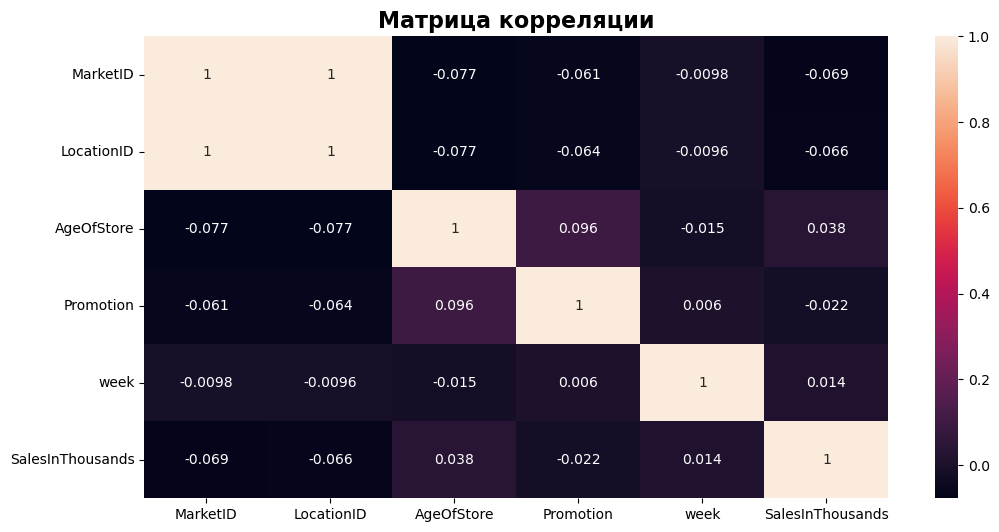

In [26]:
corr_matrix = df.corr()

plt.figure(figsize = (12,6))

sns.heatmap(corr_matrix, annot = True)

plt.title('Матрица корреляции', fontsize = 16, fontweight = 'bold')
plt.show()

<Figure size 1200x600 with 0 Axes>

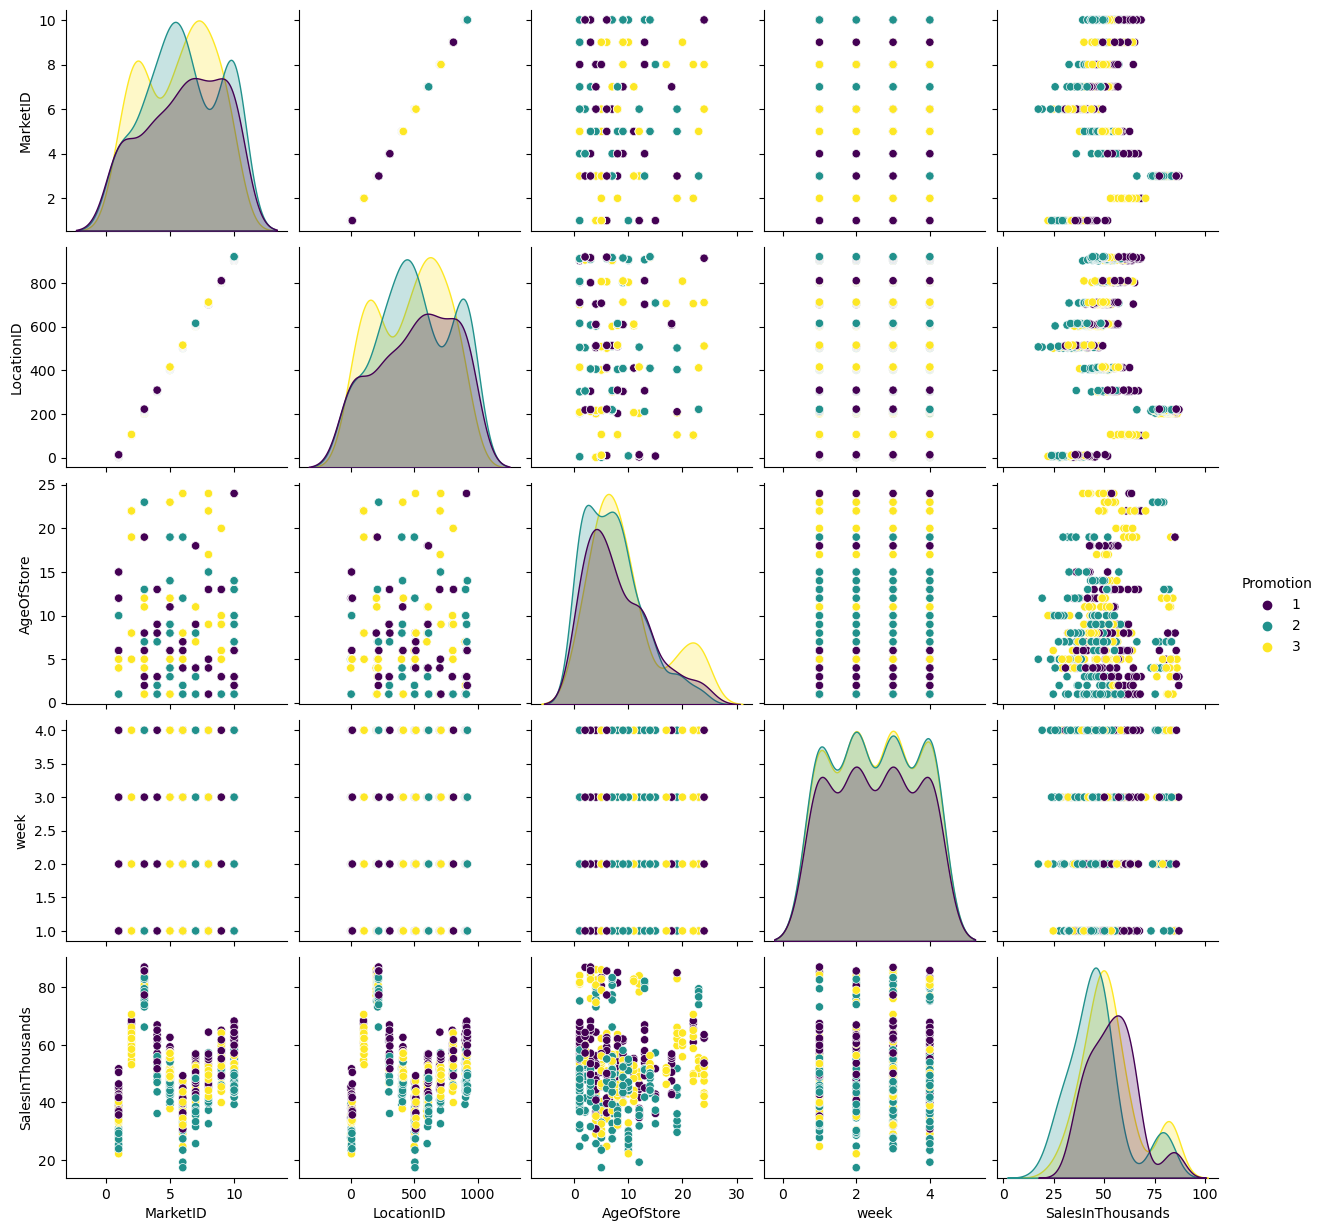

In [28]:
plt.figure(figsize =(12,6))
sns.pairplot(data = df, hue = 'Promotion', palette = 'viridis')
plt.show()

### Label Encoding

In [29]:
le = LabelEncoder()
df['MarketSize'] = le.fit_transform(df['MarketSize'])

### Выборка

In [33]:
X = df.drop('SalesInThousands', axis = 1)
y = df['SalesInThousands']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Моделирование и оценка данных

In [56]:
r2_scores = []
models = ['Linear Regression', 'Decision Tree Regression',
          'Random Forest Regression', 'Support Vector Regression',
         'Gradient Boosting', 'Ridge Regression', 'Lasso Regression']

### Linear Regression

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('##### Линейная регрессия ##### ')
print('Score: %.4f' % lr.score(X_test, y_test))
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr, squared = False)
r2 = r2_score(y_test, y_pred_lr)

print('')
print('MSE: %0.2f' % mse)
print('MAE: %0.2f' % mae)
print('RMSE: %0.2f' % rmse)
print('R2: % 0.2f' % r2)
print('Adjusted R-squared: ', 1 - (1-r2_score(y_test, y_pred_lr))*(len(y_test)-X_test.shape[1]-1))

r2_scores.append(r2)

##### Линейная регрессия ##### 
Score: 0.1439

MSE: 177.12
MAE: 10.92
RMSE: 13.31
R2:  0.14
Adjusted R-squared:  -79.47485954248019


### Decision Tree Regression

In [58]:
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
print('##### Decision Tree Regression #####')
print('Score: %.4f' % lr.score(X_test, y_test))
mse = mean_squared_error(y_test, y_pred_dtr)
mae = mean_absolute_error(y_test, y_pred_dtr)
rmse = mean_squared_error(y_test, y_pred_dtr, squared = False)
r2 = r2_score(y_test, y_pred_dtr)

print('')
print('MSE: %0.2f' % mse)
print('MAE: %0.2f' % mae)
print('RMSE: %0.2f' % rmse)
print('R2: % 0.2f' % r2)

r2_scores.append(r2)

##### Decision Tree Regression #####
Score: 0.1439

MSE: 57.32
MAE: 6.00
RMSE: 7.57
R2:  0.72


### Random Forest Regression

In [59]:
rfr = RandomForestRegressor(random_state = 42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
print('##### Random Forest Regression ######')
print('Score: %.4f' % lr.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred_rfr)
mae = mean_absolute_error(y_test, y_pred_rfr)
rmse = mean_squared_error(y_test, y_pred_rfr, squared = False)
r2 = r2_score(y_test, y_pred_rfr)

print('')
print('MSE: %0.2f' % mse)
print('MAE: %0.2f' % mae)
print('RMSE: %0.2f' % rmse)
print('R2: % 0.2f' % r2)

r2_scores.append(r2)

##### Random Forest Regression ######
Score: 0.1439

MSE: 35.19
MAE: 4.61
RMSE: 5.93
R2:  0.83


### Support Vector Regression

In [60]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print('###### Support Vector Regression ######')
print('Score: %.4f' % lr.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred_svr)
mae = mean_absolute_error(y_test, y_pred_svr)
rmse = mean_squared_error(y_test, y_pred_svr, squared = False)
r2 = r2_score(y_test, y_pred_svr)

print('')
print('MSE: %0.2f' % mse)
print('MAE: %0.2f' % mae)
print('RMSE: %0.2f' % rmse)
print('R2: % 0.2f' % r2)

r2_scores.append(r2)

###### Support Vector Regression ######
Score: 0.1439

MSE: 174.56
MAE: 10.11
RMSE: 13.21
R2:  0.16


### Gradient Boosting

In [61]:
gb = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 1, random_state = 0, verbose = 1)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print('')
print('###### Gradient Boosting Regression ######')
print('Score: %.4f' % gb.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred_gb)
mae = mean_absolute_error(y_test, y_pred_gb)
rmse = mean_squared_error(y_test, y_pred_gb, squared = False)
r2 = r2_score(y_test, y_pred_gb)

print('')
print('MSE: %0.2f' % mse)
print('MAE: %0.2f' % mae)
print('RMSE: %0.2f' % rmse)
print('R2: %0.2f' % r2)

r2_scores.append(r2)

      Iter       Train Loss   Remaining Time 
         1         186.3503            0.10s
         2         176.0541            0.10s
         3         167.7142            0.10s
         4         160.9589            0.07s
         5         155.4871            0.08s
         6         151.0549            0.08s
         7         147.0061            0.08s
         8         142.7883            0.07s
         9         139.1162            0.07s
        10         135.3619            0.07s
        20         107.5655            0.06s
        30          89.9166            0.05s
        40          77.6325            0.04s
        50          68.7018            0.03s
        60          62.1924            0.03s
        70          57.4404            0.02s
        80          53.8256            0.01s
        90          50.8353            0.01s
       100          48.2799            0.00s

###### Gradient Boosting Regression ######
Score: 0.7777

MSE: 46.00
MAE: 5.29
RMSE: 6.78
R2: 0.78

### Ridge Regression

In [62]:
rr = Ridge()
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score: %.4f' % rr.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred_rr)
mae = mean_absolute_error(y_test, y_pred_rr)
rmse = mean_squared_error(y_test, y_pred_rr, squared = False)
r2 = r2_score(y_test, y_pred_rr)

print('')
print('MSE: %0.2f' % mse)
print('MAE: %0.2f' % mae)
print('RMSE: %0.2f' % rmse)
print('R2: %0.2f' % r2)

r2_scores.append(r2)


###### Ridge Regression ######
Score: 0.1563

MSE: 174.56
MAE: 10.85
RMSE: 13.21
R2: 0.16


### Lasso Regression

In [63]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score: %.4f' % lasso.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
rmse = mean_squared_error(y_test, y_pred_lasso, squared = False)
r2 = r2_score(y_test, y_pred_lasso)

print('')
print('MSE: %0.2f' % mse)
print('MAE: %0.2f' % mae)
print('RMSE: %0.2f' % rmse)
print('R2: %0.2f' % r2)

r2_scores.append(r2)


###### Ridge Regression ######
Score: 0.1684

MSE: 172.05
MAE: 10.72
RMSE: 13.12
R2: 0.17


### Визуализация R2-оценки алгоритмов

In [68]:
compare = pd.DataFrame({'Algorithms': models, 'R2_Scores': r2_scores})
compare.sort_values(by = 'R2_Scores', ascending = False)

,Algorithms,R2_Scores
2,Random Forest Regression,0.829913
4,Gradient Boosting,0.777674
1,Decision Tree Regression,0.722940
6,Lasso Regression,0.168380
3,Support Vector Regression,0.156257
5,Ridge Regression,0.156251
0,Linear Regression,0.143884


Text(0, 0.5, 'Алгоритм')

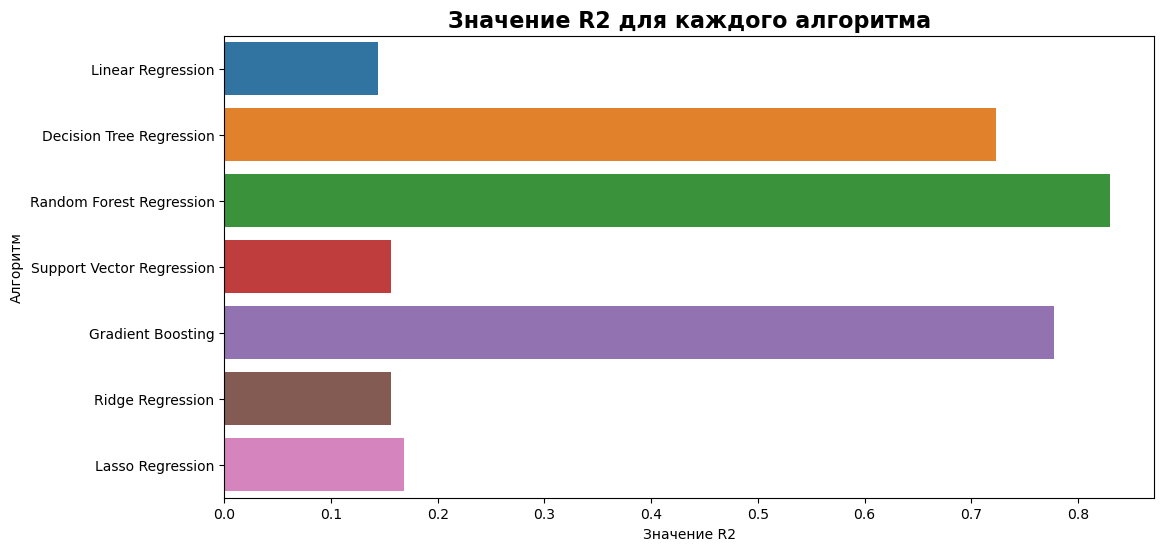

In [70]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'R2_Scores', y = 'Algorithms', data = compare)
plt.title('Значение R2 для каждого алгоритма', fontsize = 16, fontweight = 'bold')
plt.xlabel('Значение R2')
plt.ylabel('Алгоритм')

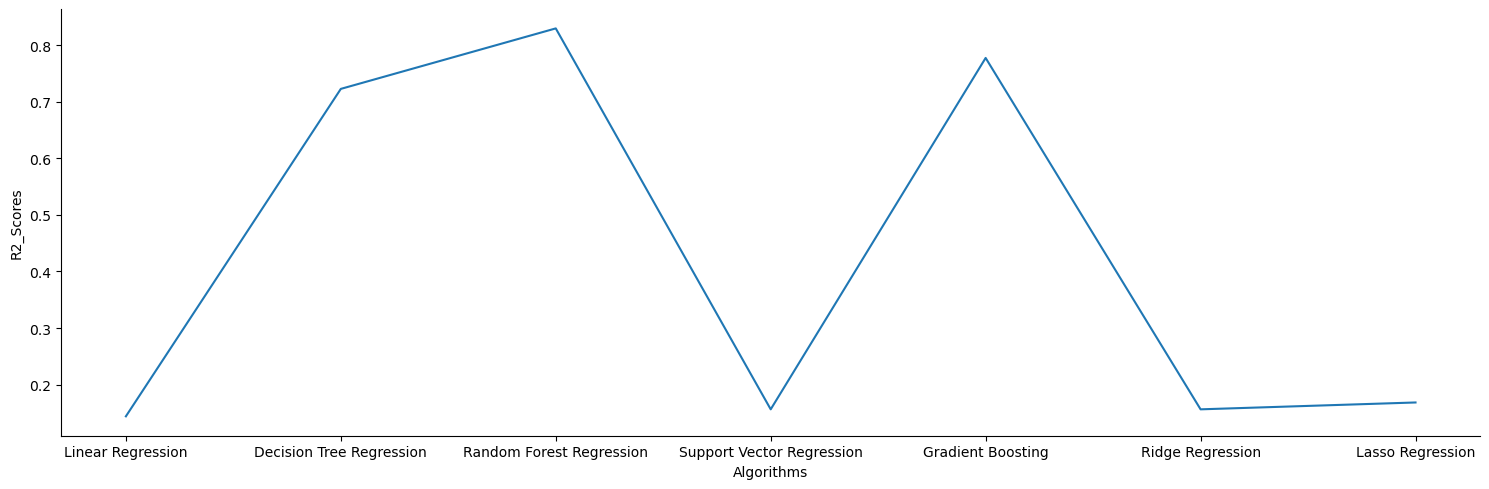

In [83]:
sns.relplot(data = compare, kind = 'line', x = 'Algorithms', y = 'R2_Scores', aspect = 3)

### Наивысший R2-показатель принадлежит алгоритму Random Forest Regression = 0.829, следовательно это наиболее доверительная модель для прогнозирования

# Итог

Основываясь на анализе набора данных "A/B тест маркетинговой кампании быстрого питания", мы провели предварительный анализ данных, выполнили проверку гипотез и выбрали соответствующие функции для моделирования. Мы использовали несколько методов визуализации, чтобы исследовать взаимосвязи между различными переменными в наборе данных.

После оценки набора данных с использованием различных алгоритмов и показателей мы пришли к выводу, что алгоритм Random Forest Regression работает лучше всего, с наименьшей среднеквадратичной ошибкой (MSE) 35.19 и наибольшим значением R-квадрата 0.829 

Gradient Boosting также работает хорошо: MSE равен 46.00, а значение R-квадрата равно 0.77

Decision Tree Regression работает хуже, но также неплохо: MSE равен 57.32, а значение R-квадрата равно 0.72

Однако алгоритмы линейной регрессии и регрессии с опорными векторами не очень хорошо справляются с прогнозированием целевой переменной SalesInThousands. Линейная регрессия имеет наивысшее значение MSE 177.12, что указывает на то, что она не подходит для моделирования взаимосвязи между независимыми и зависимыми переменными в этом наборе данных.

В целом, полученные результаты свидетельствуют о том, что алгоритмы Random Forest Regression, Gradient Boosting, и на крайний случай Decision Tree Regression, могут быть использованы для прогнозирования целевой переменной SalesInThousands более точно, чем другие алгоритмы. Эти результаты могут быть полезны специалистам по маркетингу и заинтересованным сторонам для принятия обоснованных решений об эффективности маркетинговой кампании быстрого питания.